In [1]:
import pandas as pd
import numpy as np
import pickle
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns

seed = 16

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
with open('../pickle_files/pairs_lineup_data1.pkl', 'rb') as f:
    pairs_lineup_data1_TEAM_ce= pickle.load(f)
    pairs_lineup_data1_TEAM_Season_ce = pickle.load(f)

In [4]:
X_1, y_1 = pairs_lineup_data1_TEAM_Season_ce.drop(columns=["OFFRTG"]), pairs_lineup_data1_TEAM_ce["OFFRTG"].values
X_1, y_1

(     IND  POR  DEN  MEM  GSW  NOP  PHX  CLE  SAS  ATL  ...  \
 0      1    0    0    0    0    0    0    0    0    0  ...   
 1      0    1    0    0    0    0    0    0    0    0  ...   
 2      0    0    1    0    0    0    0    0    0    0  ...   
 3      0    0    0    1    0    0    0    0    0    0  ...   
 4      0    0    0    1    0    0    0    0    0    0  ...   
 ..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
 990    0    0    0    0    0    0    0    0    0    0  ...   
 991    0    0    0    0    0    0    0    0    0    0  ...   
 992    0    0    0    0    0    0    0    0    0    0  ...   
 993    0    0    0    0    0    0    0    0    0    0  ...   
 994    0    0    0    0    0    0    0    0    0    0  ...   
 
      Mid-range_Mid-range  Mid-range_All-rounder  Mid-range_3point-shooter  \
 0                      1                      6                         0   
 1                      1                      2                         2   
 2      

In [5]:
model1_1 = pm.Model()

with model1_1:
    
    data_Cr_Cr = pm.ConstantData("data_Cr_Cr", X_1["Close-range_Close-range"])
    data_Cr_Mr = pm.ConstantData("data_Cr_Mr", X_1["Close-range_Mid-range"])
    data_Cr_Ar = pm.ConstantData("data_Cr_Ar", X_1["Close-range_All-rounder"])
    data_Cr_Bh = pm.ConstantData("data_Cr_Bh", X_1["Close-range_Ball-handler"])
    data_Cr_3s = pm.ConstantData("data_Cr_3s", X_1["Close-range_3point-shooter"])
    
    data_Mr_Mr = pm.ConstantData("data_Mr_Mr", X_1["Mid-range_Mid-range"])
    data_Mr_Ar = pm.ConstantData("data_Mr_Ar", X_1["Mid-range_All-rounder"])
    data_Mr_Bh = pm.ConstantData("data_Mr_Bh", X_1["Mid-range_Ball-handler"])
    data_Mr_3s = pm.ConstantData("data_Mr_3s", X_1["Mid-range_3point-shooter"])

    data_Ar_Ar = pm.ConstantData("data_Ar_Ar", X_1["All-rounder_All-rounder"])
    data_Ar_Bh = pm.ConstantData("data_Ar_Bh", X_1["All-rounder_Ball-handler"])
    data_Ar_3s = pm.ConstantData("data_Ar_3s", X_1["All-rounder_3point-shooter"])
    
    data_3s_3s = pm.ConstantData("data_3s_3s", X_1["3point-shooter_3point-shooter"])
    data_3s_Bh = pm.ConstantData("data_3s_Bh", X_1["3point-shooter_Ball-handler"])
    
    data_Bh_Bh = pm.ConstantData("data_Bh_Bh", X_1["Ball-handler_Ball-handler"])
    
    data_ATL = pm.ConstantData("data_ATL", X_1["ATL"])
    data_BKN = pm.ConstantData("data_BKN", X_1["BKN"])
    data_BOS = pm.ConstantData("data_BOS", X_1["BOS"])
    data_CHA = pm.ConstantData("data_CHA", X_1["CHA"])
    data_CHI = pm.ConstantData("data_CHI", X_1["CHI"])
    data_CLE = pm.ConstantData("data_CLE", X_1["CLE"])
    data_DAL = pm.ConstantData("data_DAL", X_1["DAL"])
    data_DEN = pm.ConstantData("data_DEN", X_1["DEN"])
    data_DET = pm.ConstantData("data_DET", X_1["DET"])
    data_GSW = pm.ConstantData("data_GSW", X_1["GSW"])
    data_HOU = pm.ConstantData("data_HOU", X_1["HOU"])
    data_IND = pm.ConstantData("data_IND", X_1["IND"])
    data_LAC = pm.ConstantData("data_LAC", X_1["LAC"])
    data_LAL = pm.ConstantData("data_LAL", X_1["LAL"])
    data_MEM = pm.ConstantData("data_MEM", X_1["MEM"])
    data_MIA = pm.ConstantData("data_MIA", X_1["MIA"])
    data_MIL = pm.ConstantData("data_MIL", X_1["MIL"])
    data_MIN = pm.ConstantData("data_MIN", X_1["MIN"])
    data_NOP = pm.ConstantData("data_NOP", X_1["NOP"])
    data_NYK = pm.ConstantData("data_NYK", X_1["NYK"])
    data_OKC = pm.ConstantData("data_OKC", X_1["OKC"])
    data_ORL = pm.ConstantData("data_ORL", X_1["ORL"])
    data_PHI = pm.ConstantData("data_PHI", X_1["PHI"])
    data_PHX = pm.ConstantData("data_PHX", X_1["PHX"])
    data_POR = pm.ConstantData("data_POR", X_1["POR"])
    data_SAC = pm.ConstantData("data_SAC", X_1["SAC"])
    data_SAS = pm.ConstantData("data_SAS", X_1["SAS"])
    data_TOR = pm.ConstantData("data_TOR", X_1["TOR"])
    data_UTA = pm.ConstantData("data_UTA", X_1["UTA"])
    data_WAS = pm.ConstantData("data_WAS", X_1["WAS"])

    data_12_13 = pm.ConstantData("data_12_13", X_1["2012-13"])
    data_13_14 = pm.ConstantData("data_13_14", X_1["2013-14"])
    data_14_15 = pm.ConstantData("data_14_15", X_1["2014-15"])
    data_15_16 = pm.ConstantData("data_15_16", X_1["2015-16"])
    data_16_17 = pm.ConstantData("data_16_17", X_1["2016-17"])
    data_17_18 = pm.ConstantData("data_17_18", X_1["2017-18"])
    data_18_19 = pm.ConstantData("data_18_19", X_1["2018-19"])
        
    y_data = pm.ConstantData("y_data", y_1)
    
    b_Cr_Cr = pm.Normal("b_Cr_Cr", mu=0, sigma=3)
    b_Cr_Mr = pm.Normal("b_Cr_Mr", mu=0, sigma=3)
    b_Cr_Ar = pm.Normal("b_Cr_Ar", mu=0, sigma=3)
    b_Cr_Bh = pm.Normal("b_Cr_Bh", mu=0, sigma=3)    
    b_Cr_3s = pm.Normal("b_Cr_3s", mu=0, sigma=3)
    b_Mr_Mr = pm.Normal("b_Mr_Mr", mu=0, sigma=3)
    b_Mr_Ar = pm.Normal("b_Mr_Ar", mu=0, sigma=3)
    b_Mr_Bh = pm.Normal("b_Mr_Bh", mu=0, sigma=3) 
    b_Mr_3s = pm.Normal("b_Mr_3s", mu=0, sigma=3)
    b_Ar_Ar = pm.Normal("b_Ar_Ar", mu=0, sigma=3)
    b_Ar_Bh = pm.Normal("b_Ar_Bh", mu=0, sigma=3) 
    b_Ar_3s = pm.Normal("b_Ar_3s", mu=0, sigma=3)
    b_3s_3s = pm.Normal("b_3s_3s", mu=0, sigma=3)
    b_3s_Bh = pm.Normal("b_Bh_3s", mu=0, sigma=3) 
    b_Bh_Bh = pm.Normal("b_Bh_Bh", mu=0, sigma=3) 
    
    b_ATL = pm.Normal("b_ATL", mu=105, sigma=3)
    b_BKN = pm.Normal("b_BKN", mu=105, sigma=3)
    b_BOS = pm.Normal("b_BOS", mu=105, sigma=3)
    b_CHA = pm.Normal("b_CHA", mu=105, sigma=3)
    b_CHI = pm.Normal("b_CHI", mu=105, sigma=3)
    b_CLE = pm.Normal("b_CLE", mu=105, sigma=3)
    b_DAL = pm.Normal("b_DAL", mu=105, sigma=3)
    b_DEN = pm.Normal("b_DEN", mu=105, sigma=3)
    b_DET = pm.Normal("b_DET", mu=105, sigma=3)
    b_GSW = pm.Normal("b_GSW", mu=105, sigma=3)
    b_HOU = pm.Normal("b_HOU", mu=105, sigma=3)
    b_IND = pm.Normal("b_IND", mu=105, sigma=3)
    b_LAC = pm.Normal("b_LAC", mu=105, sigma=3)
    b_LAL = pm.Normal("b_LAL", mu=105, sigma=3)
    b_MEM = pm.Normal("b_MEM", mu=105, sigma=3)
    b_MIA = pm.Normal("b_MIA", mu=105, sigma=3)
    b_MIL = pm.Normal("b_MIL", mu=105, sigma=3)
    b_MIN = pm.Normal("b_MIN", mu=105, sigma=3)
    b_NOP = pm.Normal("b_NOP", mu=105, sigma=3)
    b_NYK = pm.Normal("b_NYK", mu=105, sigma=3)
    b_OKC = pm.Normal("b_OKC", mu=105, sigma=3)
    b_ORL = pm.Normal("b_ORL", mu=105, sigma=3)
    b_PHI = pm.Normal("b_PHI", mu=105, sigma=3)
    b_PHX = pm.Normal("b_PHX", mu=105, sigma=3)
    b_POR = pm.Normal("b_POR", mu=105, sigma=3)
    b_SAC = pm.Normal("b_SAC", mu=105, sigma=3)
    b_SAS = pm.Normal("b_SAS", mu=105, sigma=3)
    b_TOR = pm.Normal("b_TOR", mu=105, sigma=3)
    b_UTA = pm.Normal("b_UTA", mu=105, sigma=3)
    b_WAS = pm.Normal("b_WAS", mu=105, sigma=3)
    
    b_12_13 = pm.Normal("b_12_13", mu=0, sigma=3)
    b_13_14 = pm.Normal("b_13_14", mu=0, sigma=3)
    b_14_15 = pm.Normal("b_14_15", mu=0, sigma=3)
    b_15_16 = pm.Normal("b_15_16", mu=0, sigma=3)
    b_16_17 = pm.Normal("b_16_17", mu=0, sigma=3)
    b_17_18 = pm.Normal("b_17_18", mu=0, sigma=3)
    b_18_19 = pm.Normal("b_18_19", mu=0, sigma=3)
    
    mu = pm.Deterministic("mu", 
                                 b_Cr_Cr * data_Cr_Cr
                                + b_Cr_Mr * data_Cr_Mr
                                + b_Cr_Ar * data_Cr_Ar
                                + b_Cr_Bh * data_Cr_Bh
                                + b_Cr_3s * data_Cr_3s
                                + b_Mr_Mr * data_Mr_Mr
                                + b_Mr_Ar * data_Mr_Ar
                                + b_Mr_Bh * data_Mr_Bh
                                + b_Mr_3s * data_Mr_3s
                                + b_Ar_Ar * data_Ar_Ar
                                + b_Ar_Bh * data_Ar_Bh
                                + b_Ar_3s * data_Ar_3s
                                + b_3s_3s * data_3s_3s
                                + b_3s_Bh * data_3s_Bh
                                + b_Bh_Bh * data_Bh_Bh
                                + b_ATL * data_ATL
                                + b_BKN * data_BKN
                                + b_BOS * data_BOS
                                + b_CHA * data_CHA
                                + b_CHI * data_CHI
                                + b_CLE * data_CLE
                                + b_DAL * data_DAL
                                + b_DEN * data_DEN
                                + b_DET * data_DET
                                + b_GSW * data_GSW
                                + b_HOU * data_HOU
                                + b_IND * data_IND
                                + b_LAC * data_LAC
                                + b_LAL * data_LAL
                                + b_MEM * data_MEM
                                + b_MIA * data_MIA
                                + b_MIL * data_MIL
                                + b_MIN * data_MIN
                                + b_NOP * data_NOP
                                + b_NYK * data_NYK
                                + b_OKC * data_OKC
                                + b_ORL * data_ORL
                                + b_PHI * data_PHI
                                + b_PHX * data_PHX
                                + b_POR * data_POR
                                + b_SAC * data_SAC
                                + b_SAS * data_SAS
                                + b_TOR * data_TOR
                                + b_UTA * data_UTA
                                + b_WAS * data_WAS
                                + b_12_13 * data_12_13
                                + b_13_14 * data_13_14
                                + b_14_15 * data_14_15
                                + b_15_16 * data_15_16
                                + b_16_17 * data_16_17
                                + b_17_18 * data_17_18
                                + b_18_19 * data_18_19
                                )
    
    sigma_epsilon = pm.HalfNormal("sigma_epsilon", sigma=1)
    
    obs = pm.Normal("obs", mu=mu, sigma=sigma_epsilon, observed=y_data)

In [6]:
with model1_1:
    idata1_1 = pm.sample(draws=8000, tune=2000, chains=4, random_seed=seed, target_accept=0.99)
    pm.compute_log_likelihood(idata1_1)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b_Cr_Cr, b_Cr_Mr, b_Cr_Ar, b_Cr_Bh, b_Cr_3s, b_Mr_Mr, b_Mr_Ar, b_Mr_Bh, b_Mr_3s, b_Ar_Ar, b_Ar_Bh, b_Ar_3s, b_3s_3s, b_Bh_3s, b_Bh_Bh, b_ATL, b_BKN, b_BOS, b_CHA, b_CHI, b_CLE, b_DAL, b_DEN, b_DET, b_GSW, b_HOU, b_IND, b_LAC, b_LAL, b_MEM, b_MIA, b_MIL, b_MIN, b_NOP, b_NYK, b_OKC, b_ORL, b_PHI, b_PHX, b_POR, b_SAC, b_SAS, b_TOR, b_UTA, b_WAS, b_12_13, b_13_14, b_14_15, b_15_16, b_16_17, b_17_18, b_18_19, sigma_epsilon]


Sampling 4 chains for 2_000 tune and 8_000 draw iterations (8_000 + 32_000 draws total) took 520 seconds.
/home/k_yamada/.local/lib/python3.8/site-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


/home/k_yamada/.local/lib/python3.8/site-packages/arviz/plots/traceplot.py:222: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (1048), generating only 20 plots
  warnings.warn(
/home/k_yamada/.local/lib/python3.8/site-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


array([[<Axes: title={'center': 'b_Cr_Cr'}>,
        <Axes: title={'center': 'b_Cr_Cr'}>],
       [<Axes: title={'center': 'b_Cr_Mr'}>,
        <Axes: title={'center': 'b_Cr_Mr'}>],
       [<Axes: title={'center': 'b_Cr_Ar'}>,
        <Axes: title={'center': 'b_Cr_Ar'}>],
       [<Axes: title={'center': 'b_Cr_Bh'}>,
        <Axes: title={'center': 'b_Cr_Bh'}>],
       [<Axes: title={'center': 'b_Cr_3s'}>,
        <Axes: title={'center': 'b_Cr_3s'}>],
       [<Axes: title={'center': 'b_Mr_Mr'}>,
        <Axes: title={'center': 'b_Mr_Mr'}>],
       [<Axes: title={'center': 'b_Mr_Ar'}>,
        <Axes: title={'center': 'b_Mr_Ar'}>],
       [<Axes: title={'center': 'b_Mr_Bh'}>,
        <Axes: title={'center': 'b_Mr_Bh'}>],
       [<Axes: title={'center': 'b_Mr_3s'}>,
        <Axes: title={'center': 'b_Mr_3s'}>],
       [<Axes: title={'center': 'b_Ar_Ar'}>,
        <Axes: title={'center': 'b_Ar_Ar'}>],
       [<Axes: title={'center': 'b_Ar_Bh'}>,
        <Axes: title={'center': 'b_Ar_Bh'}>],

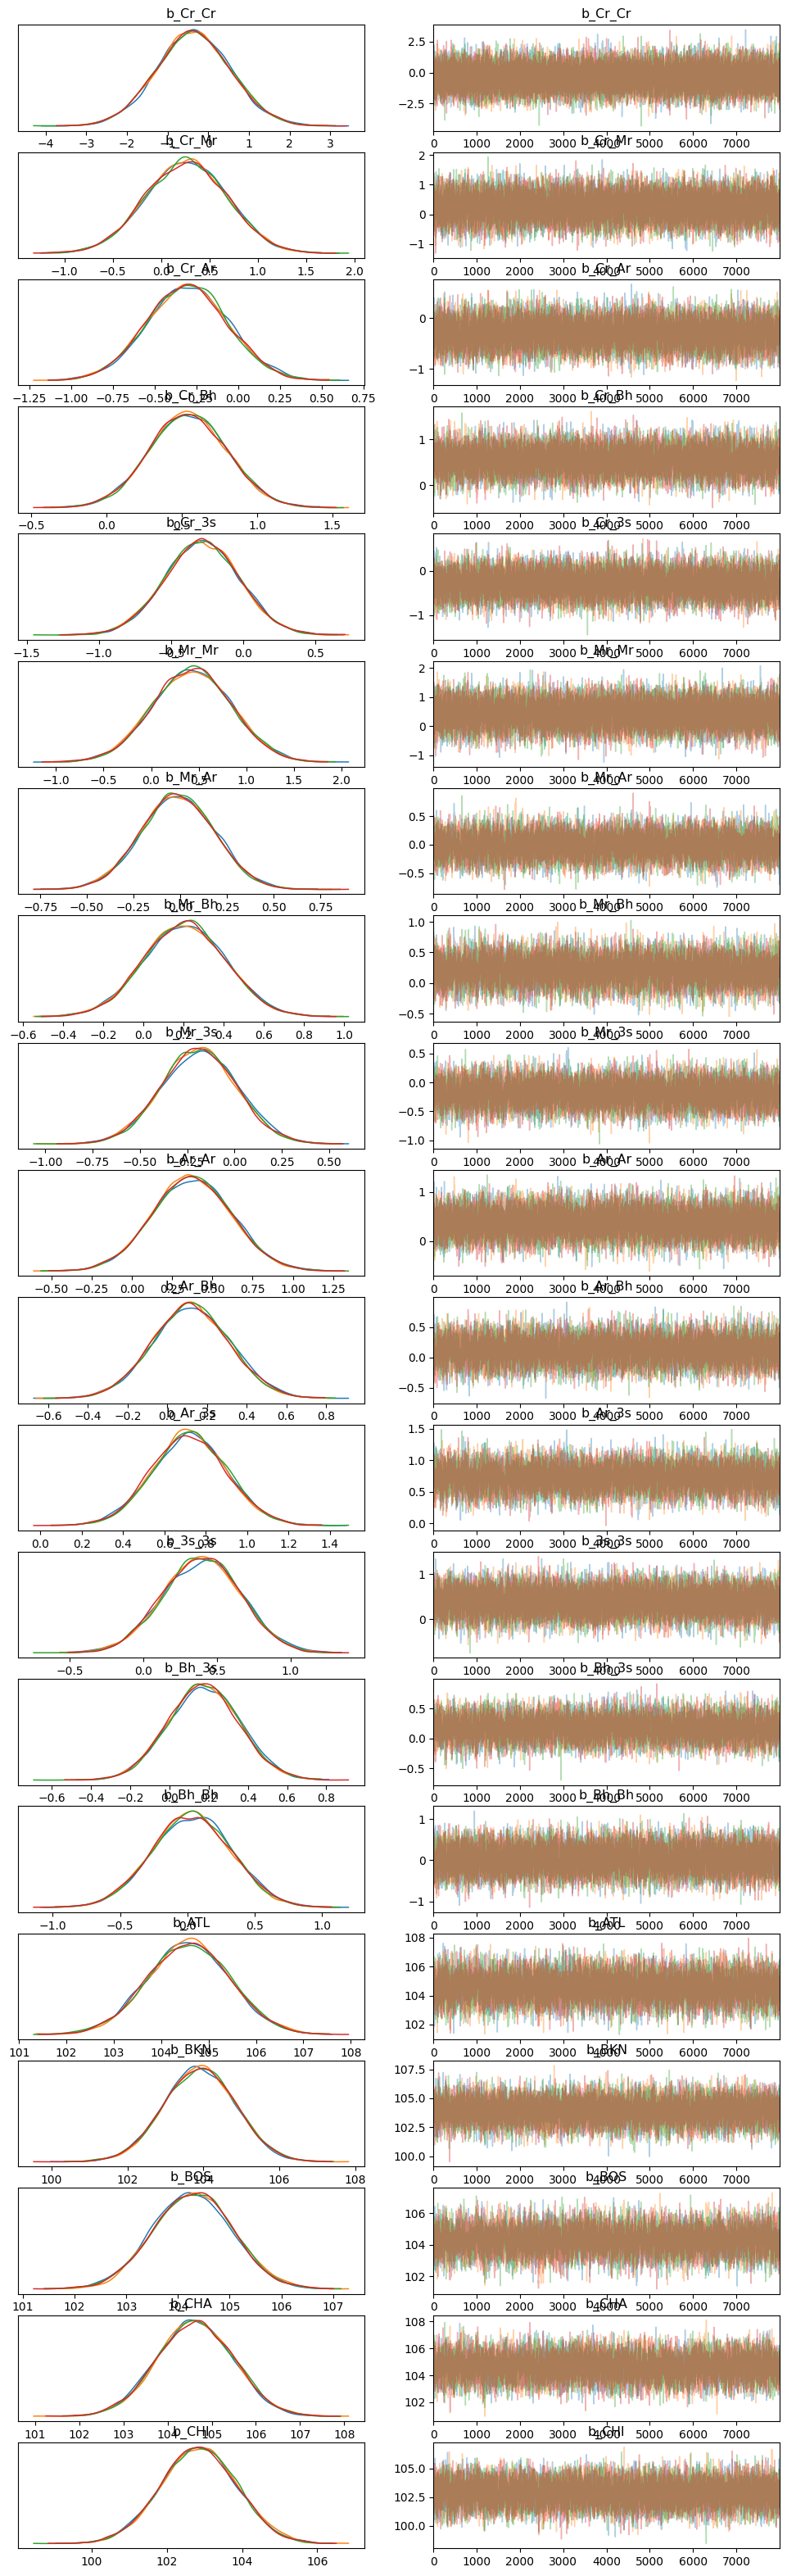

In [7]:
az.plot_trace(idata1_1, compact=False)

In [8]:
param_names1_1 = [rv.name for rv in model1_1.free_RVs]
summary1_1 = az.summary(idata1_1, var_names=param_names1_1)

In [9]:
with open("../pickle_files/idata1_1.pkl", "wb") as f:
    pickle.dump(idata1_1, f)
    pickle.dump(summary1_1, f)

In [3]:
with open('../pickle_files/idata1_1.pkl', 'rb') as f:
    idata1_1 = pickle.load(f)
    summary1_1 = pickle.load(f)

In [4]:
summary1_1

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b_Cr_Cr,-0.365,0.918,-2.127,1.333,0.006,0.005,24446.0,23604.0,1.0
b_Cr_Mr,0.263,0.419,-0.510,1.056,0.004,0.003,10597.0,19407.0,1.0
b_Cr_Ar,-0.302,0.244,-0.767,0.154,0.003,0.002,7405.0,15174.0,1.0
b_Cr_Bh,0.542,0.259,0.046,1.022,0.003,0.002,7656.0,15914.0,1.0
b_Cr_3s,-0.286,0.258,-0.773,0.197,0.003,0.002,8314.0,16354.0,1.0
b_Mr_Mr,0.430,0.415,-0.343,1.216,0.004,0.003,12076.0,19032.0,1.0
b_Mr_Ar,-0.014,0.197,-0.381,0.359,0.003,0.002,5324.0,11485.0,1.0
b_Mr_Bh,0.207,0.204,-0.178,0.588,0.003,0.002,5359.0,12216.0,1.0
b_Mr_3s,-0.187,0.200,-0.560,0.190,0.003,0.002,5817.0,11862.0,1.0
b_Ar_Ar,0.374,0.246,-0.088,0.839,0.003,0.002,8368.0,17270.0,1.0


In [12]:
rhat_vals1_1 = az.rhat(idata1_1).values()

result1_1 = np.max([np.max(i.values) for i in rhat_vals1_1])
print('Max rhat:', result1_1)

for i in rhat_vals1_1:
    if np.max(i.values)>=1.2:
        print(i.name, np.max(i.values), np.mean(i.values), i.values.shape, sep='  ====>  ')

Max rhat: 1.0009509740481575


In [13]:
X_2, y_2 = pairs_lineup_data1_TEAM_ce.drop(columns=["Season", "OFFRTG"]), pairs_lineup_data1_TEAM_ce["OFFRTG"].values
season = pd.Categorical(pairs_lineup_data1_TEAM_ce["Season"]).codes
X_2, y_2, season

(     IND  POR  DEN  MEM  GSW  NOP  PHX  CLE  SAS  ATL  ...  \
 0      1    0    0    0    0    0    0    0    0    0  ...   
 1      0    1    0    0    0    0    0    0    0    0  ...   
 2      0    0    1    0    0    0    0    0    0    0  ...   
 3      0    0    0    1    0    0    0    0    0    0  ...   
 4      0    0    0    1    0    0    0    0    0    0  ...   
 ..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
 990    0    0    0    0    0    0    0    0    0    0  ...   
 991    0    0    0    0    0    0    0    0    0    0  ...   
 992    0    0    0    0    0    0    0    0    0    0  ...   
 993    0    0    0    0    0    0    0    0    0    0  ...   
 994    0    0    0    0    0    0    0    0    0    0  ...   
 
      Mid-range_Mid-range  Mid-range_All-rounder  Mid-range_3point-shooter  \
 0                      1                      6                         0   
 1                      1                      2                         2   
 2      

In [14]:
model1_2 = pm.Model()

with model1_2:
    
    data_Cr_Cr = pm.ConstantData("data_Cr_Cr", X_2["Close-range_Close-range"])
    data_Cr_Mr = pm.ConstantData("data_Cr_Mr", X_2["Close-range_Mid-range"])
    data_Cr_Ar = pm.ConstantData("data_Cr_Ar", X_2["Close-range_All-rounder"])
    data_Cr_Bh = pm.ConstantData("data_Cr_Bh", X_2["Close-range_Ball-handler"])
    data_Cr_3s = pm.ConstantData("data_Cr_3s", X_2["Close-range_3point-shooter"])
    
    data_Mr_Mr = pm.ConstantData("data_Mr_Mr", X_2["Mid-range_Mid-range"])
    data_Mr_Ar = pm.ConstantData("data_Mr_Ar", X_2["Mid-range_All-rounder"])
    data_Mr_Bh = pm.ConstantData("data_Mr_Bh", X_2["Mid-range_Ball-handler"])
    data_Mr_3s = pm.ConstantData("data_Mr_3s", X_2["Mid-range_3point-shooter"])

    data_Ar_Ar = pm.ConstantData("data_Ar_Ar", X_2["All-rounder_All-rounder"])
    data_Ar_Bh = pm.ConstantData("data_Ar_Bh", X_2["All-rounder_Ball-handler"])
    data_Ar_3s = pm.ConstantData("data_Ar_3s", X_2["All-rounder_3point-shooter"])
    
    data_3s_3s = pm.ConstantData("data_3s_3s", X_2["3point-shooter_3point-shooter"])
    data_3s_Bh = pm.ConstantData("data_3s_Bh", X_2["3point-shooter_Ball-handler"])
    
    data_Bh_Bh = pm.ConstantData("data_Bh_Bh", X_2["Ball-handler_Ball-handler"])
    
    data_ATL = pm.ConstantData("data_ATL", X_2["ATL"])
    data_BKN = pm.ConstantData("data_BKN", X_2["BKN"])
    data_BOS = pm.ConstantData("data_BOS", X_2["BOS"])
    data_CHA = pm.ConstantData("data_CHA", X_2["CHA"])
    data_CHI = pm.ConstantData("data_CHI", X_2["CHI"])
    data_CLE = pm.ConstantData("data_CLE", X_2["CLE"])
    data_DAL = pm.ConstantData("data_DAL", X_2["DAL"])
    data_DEN = pm.ConstantData("data_DEN", X_2["DEN"])
    data_DET = pm.ConstantData("data_DET", X_2["DET"])
    data_GSW = pm.ConstantData("data_GSW", X_2["GSW"])
    data_HOU = pm.ConstantData("data_HOU", X_2["HOU"])
    data_IND = pm.ConstantData("data_IND", X_2["IND"])
    data_LAC = pm.ConstantData("data_LAC", X_2["LAC"])
    data_LAL = pm.ConstantData("data_LAL", X_2["LAL"])
    data_MEM = pm.ConstantData("data_MEM", X_2["MEM"])
    data_MIA = pm.ConstantData("data_MIA", X_2["MIA"])
    data_MIL = pm.ConstantData("data_MIL", X_2["MIL"])
    data_MIN = pm.ConstantData("data_MIN", X_2["MIN"])
    data_NOP = pm.ConstantData("data_NOP", X_2["NOP"])
    data_NYK = pm.ConstantData("data_NYK", X_2["NYK"])
    data_OKC = pm.ConstantData("data_OKC", X_2["OKC"])
    data_ORL = pm.ConstantData("data_ORL", X_2["ORL"])
    data_PHI = pm.ConstantData("data_PHI", X_2["PHI"])
    data_PHX = pm.ConstantData("data_PHX", X_2["PHX"])
    data_POR = pm.ConstantData("data_POR", X_2["POR"])
    data_SAC = pm.ConstantData("data_SAC", X_2["SAC"])
    data_SAS = pm.ConstantData("data_SAS", X_2["SAS"])
    data_TOR = pm.ConstantData("data_TOR", X_2["TOR"])
    data_UTA = pm.ConstantData("data_UTA", X_2["UTA"])
    data_WAS = pm.ConstantData("data_WAS", X_2["WAS"])
    
    y_data = pm.ConstantData("y_data", y_2)
    
    season_data = pm.ConstantData("season_data", season)
    
    b_Cr_Cr = pm.Normal("b_Cr_Cr", mu=0, sigma=3)
    b_Cr_Mr = pm.Normal("b_Cr_Mr", mu=0, sigma=3)
    b_Cr_Ar = pm.Normal("b_Cr_Ar", mu=0, sigma=3)
    b_Cr_Bh = pm.Normal("b_Cr_Bh", mu=0, sigma=3)    
    b_Cr_3s = pm.Normal("b_Cr_3s", mu=0, sigma=3)
    b_Mr_Mr = pm.Normal("b_Mr_Mr", mu=0, sigma=3)
    b_Mr_Ar = pm.Normal("b_Mr_Ar", mu=0, sigma=3)
    b_Mr_Bh = pm.Normal("b_Mr_Bh", mu=0, sigma=3) 
    b_Mr_3s = pm.Normal("b_Mr_3s", mu=0, sigma=3)
    b_Ar_Ar = pm.Normal("b_Ar_Ar", mu=0, sigma=3)
    b_Ar_Bh = pm.Normal("b_Ar_Bh", mu=0, sigma=3) 
    b_Ar_3s = pm.Normal("b_Ar_3s", mu=0, sigma=3)
    b_3s_3s = pm.Normal("b_3s_3s", mu=0, sigma=3)
    b_3s_Bh = pm.Normal("b_3s_Bh", mu=0, sigma=3) 
    b_Bh_Bh = pm.Normal("b_Bh_Bh", mu=0, sigma=3) 
    
    b_ATL = pm.Normal("b_ATL", mu=105, sigma=3)
    b_BKN = pm.Normal("b_BKN", mu=105, sigma=3)
    b_BOS = pm.Normal("b_BOS", mu=105, sigma=3)
    b_CHA = pm.Normal("b_CHA", mu=105, sigma=3)
    b_CHI = pm.Normal("b_CHI", mu=105, sigma=3)
    b_CLE = pm.Normal("b_CLE", mu=105, sigma=3)
    b_DAL = pm.Normal("b_DAL", mu=105, sigma=3)
    b_DEN = pm.Normal("b_DEN", mu=105, sigma=3)
    b_DET = pm.Normal("b_DET", mu=105, sigma=3)
    b_GSW = pm.Normal("b_GSW", mu=105, sigma=3)
    b_HOU = pm.Normal("b_HOU", mu=105, sigma=3)
    b_IND = pm.Normal("b_IND", mu=105, sigma=3)
    b_LAC = pm.Normal("b_LAC", mu=105, sigma=3)
    b_LAL = pm.Normal("b_LAL", mu=105, sigma=3)
    b_MEM = pm.Normal("b_MEM", mu=105, sigma=3)
    b_MIA = pm.Normal("b_MIA", mu=105, sigma=3)
    b_MIL = pm.Normal("b_MIL", mu=105, sigma=3)
    b_MIN = pm.Normal("b_MIN", mu=105, sigma=3)
    b_NOP = pm.Normal("b_NOP", mu=105, sigma=3)
    b_NYK = pm.Normal("b_NYK", mu=105, sigma=3)
    b_OKC = pm.Normal("b_OKC", mu=105, sigma=3)
    b_ORL = pm.Normal("b_ORL", mu=105, sigma=3)
    b_PHI = pm.Normal("b_PHI", mu=105, sigma=3)
    b_PHX = pm.Normal("b_PHX", mu=105, sigma=3)
    b_POR = pm.Normal("b_POR", mu=105, sigma=3)
    b_SAC = pm.Normal("b_SAC", mu=105, sigma=3)
    b_SAS = pm.Normal("b_SAS", mu=105, sigma=3)
    b_TOR = pm.Normal("b_TOR", mu=105, sigma=3)
    b_UTA = pm.Normal("b_UTA", mu=105, sigma=3)
    b_WAS = pm.Normal("b_WAS", mu=105, sigma=3)
    
    mu_r_t = pm.Normal("mu_r_t", mu=0, sigma=3)
    sigma_r_t = pm.HalfNormal("sigma_r_t", sigma=1)
    
    r_ATL = pm.Normal("r_ATL", mu=mu_r_t, sigma=sigma_r_t, shape=7)
    r_BKN = pm.Normal("r_BKN", mu=mu_r_t, sigma=sigma_r_t, shape=7)
    r_BOS = pm.Normal("r_BOS", mu=mu_r_t, sigma=sigma_r_t, shape=7)
    r_CHA = pm.Normal("r_CHA", mu=mu_r_t, sigma=sigma_r_t, shape=7)
    r_CHI = pm.Normal("r_CHI", mu=mu_r_t, sigma=sigma_r_t, shape=7)
    r_CLE = pm.Normal("r_CLE", mu=mu_r_t, sigma=sigma_r_t, shape=7)
    r_DAL = pm.Normal("r_DAL", mu=mu_r_t, sigma=sigma_r_t, shape=7)
    r_DEN = pm.Normal("r_DEN", mu=mu_r_t, sigma=sigma_r_t, shape=7)
    r_DET = pm.Normal("r_DET", mu=mu_r_t, sigma=sigma_r_t, shape=7)
    r_GSW = pm.Normal("r_GSW", mu=mu_r_t, sigma=sigma_r_t, shape=7)
    r_HOU = pm.Normal("r_HOU", mu=mu_r_t, sigma=sigma_r_t, shape=7)
    r_IND = pm.Normal("r_IND", mu=mu_r_t, sigma=sigma_r_t, shape=7)
    r_LAC = pm.Normal("r_LAC", mu=mu_r_t, sigma=sigma_r_t, shape=7)
    r_LAL = pm.Normal("r_LAL", mu=mu_r_t, sigma=sigma_r_t, shape=7)
    r_MEM = pm.Normal("r_MEM", mu=mu_r_t, sigma=sigma_r_t, shape=7)
    r_MIA = pm.Normal("r_MIA", mu=mu_r_t, sigma=sigma_r_t, shape=7)
    r_MIL = pm.Normal("r_MIL", mu=mu_r_t, sigma=sigma_r_t, shape=7)
    r_MIN = pm.Normal("r_MIN", mu=mu_r_t, sigma=sigma_r_t, shape=7)
    r_NOP = pm.Normal("r_NOP", mu=mu_r_t, sigma=sigma_r_t, shape=7)
    r_NYK = pm.Normal("r_NYK", mu=mu_r_t, sigma=sigma_r_t, shape=7)
    r_OKC = pm.Normal("r_OKC", mu=mu_r_t, sigma=sigma_r_t, shape=7)
    r_ORL = pm.Normal("r_ORL", mu=mu_r_t, sigma=sigma_r_t, shape=7)
    r_PHI = pm.Normal("r_PHI", mu=mu_r_t, sigma=sigma_r_t, shape=7)
    r_PHX = pm.Normal("r_PHX", mu=mu_r_t, sigma=sigma_r_t, shape=7)
    r_POR = pm.Normal("r_POR", mu=mu_r_t, sigma=sigma_r_t, shape=7)
    r_SAC = pm.Normal("r_SAC", mu=mu_r_t, sigma=sigma_r_t, shape=7)
    r_SAS = pm.Normal("r_SAS", mu=mu_r_t, sigma=sigma_r_t, shape=7)
    r_TOR = pm.Normal("r_TOR", mu=mu_r_t, sigma=sigma_r_t, shape=7)
    r_UTA = pm.Normal("r_UTA", mu=mu_r_t, sigma=sigma_r_t, shape=7)
    r_WAS = pm.Normal("r_WAS", mu=mu_r_t, sigma=sigma_r_t, shape=7)
    
    mu = pm.Deterministic("mu", 
                                b_Cr_Cr * data_Cr_Cr
                                + b_Cr_Mr * data_Cr_Mr
                                + b_Cr_Ar * data_Cr_Ar
                                + b_Cr_Bh * data_Cr_Bh
                                + b_Cr_3s * data_Cr_3s
                                + b_Mr_Mr * data_Mr_Mr
                                + b_Mr_Ar * data_Mr_Ar
                                + b_Mr_Bh * data_Mr_Bh
                                + b_Mr_3s * data_Mr_3s
                                + b_Ar_Ar * data_Ar_Ar
                                + b_Ar_Bh * data_Ar_Bh
                                + b_Ar_3s * data_Ar_3s
                                + b_3s_3s * data_3s_3s
                                + b_3s_Bh * data_3s_Bh
                                + b_Bh_Bh * data_Bh_Bh
                                + (b_ATL + r_ATL[season]) * data_ATL
                                + (b_BKN + r_BKN[season]) * data_BKN
                                + (b_BOS + r_BOS[season]) * data_BOS
                                + (b_CHA + r_CHA[season]) * data_CHA
                                + (b_CHI + r_CHI[season]) * data_CHI
                                + (b_CLE + r_CLE[season]) * data_CLE
                                + (b_DAL + r_DAL[season]) * data_DAL
                                + (b_DEN + r_DEN[season]) * data_DEN
                                + (b_DET + r_DET[season]) * data_DET
                                + (b_GSW + r_GSW[season]) * data_GSW
                                + (b_HOU + r_HOU[season]) * data_HOU
                                + (b_IND + r_IND[season]) * data_IND
                                + (b_LAC + r_LAC[season]) * data_LAC
                                + (b_LAL + r_LAL[season]) * data_LAL
                                + (b_MEM + r_MEM[season]) * data_MEM
                                + (b_MIA + r_MIA[season]) * data_MIA
                                + (b_MIL + r_MIL[season]) * data_MIL
                                + (b_MIN + r_MIN[season]) * data_MIN
                                + (b_NOP + r_NOP[season]) * data_NOP
                                + (b_NYK + r_NYK[season]) * data_NYK
                                + (b_OKC + r_OKC[season]) * data_OKC
                                + (b_ORL + r_ORL[season]) * data_ORL
                                + (b_PHI + r_PHI[season]) * data_PHI
                                + (b_PHX + r_PHX[season]) * data_PHX
                                + (b_POR + r_POR[season]) * data_POR
                                + (b_SAC + r_SAC[season]) * data_SAC
                                + (b_SAS + r_SAS[season]) * data_SAS
                                + (b_TOR + r_TOR[season]) * data_TOR
                                + (b_UTA + r_UTA[season]) * data_UTA
                                + (b_WAS + r_WAS[season]) * data_WAS                                
                                )
    
    sigma_epsilon = pm.HalfNormal("sigma_epsilon", sigma=1)
    
    obs = pm.Normal("obs", mu=mu, sigma=sigma_epsilon, observed=y_data)

In [15]:
with model1_2:
    idata1_2 = pm.sample(draws=16000, tune=4000, chains=4, random_seed=seed, target_accept=0.99)
    pm.compute_log_likelihood(idata1_2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b_Cr_Cr, b_Cr_Mr, b_Cr_Ar, b_Cr_Bh, b_Cr_3s, b_Mr_Mr, b_Mr_Ar, b_Mr_Bh, b_Mr_3s, b_Ar_Ar, b_Ar_Bh, b_Ar_3s, b_3s_3s, b_3s_Bh, b_Bh_Bh, b_ATL, b_BKN, b_BOS, b_CHA, b_CHI, b_CLE, b_DAL, b_DEN, b_DET, b_GSW, b_HOU, b_IND, b_LAC, b_LAL, b_MEM, b_MIA, b_MIL, b_MIN, b_NOP, b_NYK, b_OKC, b_ORL, b_PHI, b_PHX, b_POR, b_SAC, b_SAS, b_TOR, b_UTA, b_WAS, mu_r_t, sigma_r_t, r_ATL, r_BKN, r_BOS, r_CHA, r_CHI, r_CLE, r_DAL, r_DEN, r_DET, r_GSW, r_HOU, r_IND, r_LAC, r_LAL, r_MEM, r_MIA, r_MIL, r_MIN, r_NOP, r_NYK, r_OKC, r_ORL, r_PHI, r_PHX, r_POR, r_SAC, r_SAS, r_TOR, r_UTA, r_WAS, sigma_epsilon]


Sampling 4 chains for 4_000 tune and 16_000 draw iterations (16_000 + 64_000 draws total) took 4140 seconds.


/home/k_yamada/.local/lib/python3.8/site-packages/arviz/plots/traceplot.py:222: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (1253), generating only 20 plots
  warnings.warn(


array([[<Axes: title={'center': 'b_Cr_Cr'}>,
        <Axes: title={'center': 'b_Cr_Cr'}>],
       [<Axes: title={'center': 'b_Cr_Mr'}>,
        <Axes: title={'center': 'b_Cr_Mr'}>],
       [<Axes: title={'center': 'b_Cr_Ar'}>,
        <Axes: title={'center': 'b_Cr_Ar'}>],
       [<Axes: title={'center': 'b_Cr_Bh'}>,
        <Axes: title={'center': 'b_Cr_Bh'}>],
       [<Axes: title={'center': 'b_Cr_3s'}>,
        <Axes: title={'center': 'b_Cr_3s'}>],
       [<Axes: title={'center': 'b_Mr_Mr'}>,
        <Axes: title={'center': 'b_Mr_Mr'}>],
       [<Axes: title={'center': 'b_Mr_Ar'}>,
        <Axes: title={'center': 'b_Mr_Ar'}>],
       [<Axes: title={'center': 'b_Mr_Bh'}>,
        <Axes: title={'center': 'b_Mr_Bh'}>],
       [<Axes: title={'center': 'b_Mr_3s'}>,
        <Axes: title={'center': 'b_Mr_3s'}>],
       [<Axes: title={'center': 'b_Ar_Ar'}>,
        <Axes: title={'center': 'b_Ar_Ar'}>],
       [<Axes: title={'center': 'b_Ar_Bh'}>,
        <Axes: title={'center': 'b_Ar_Bh'}>],

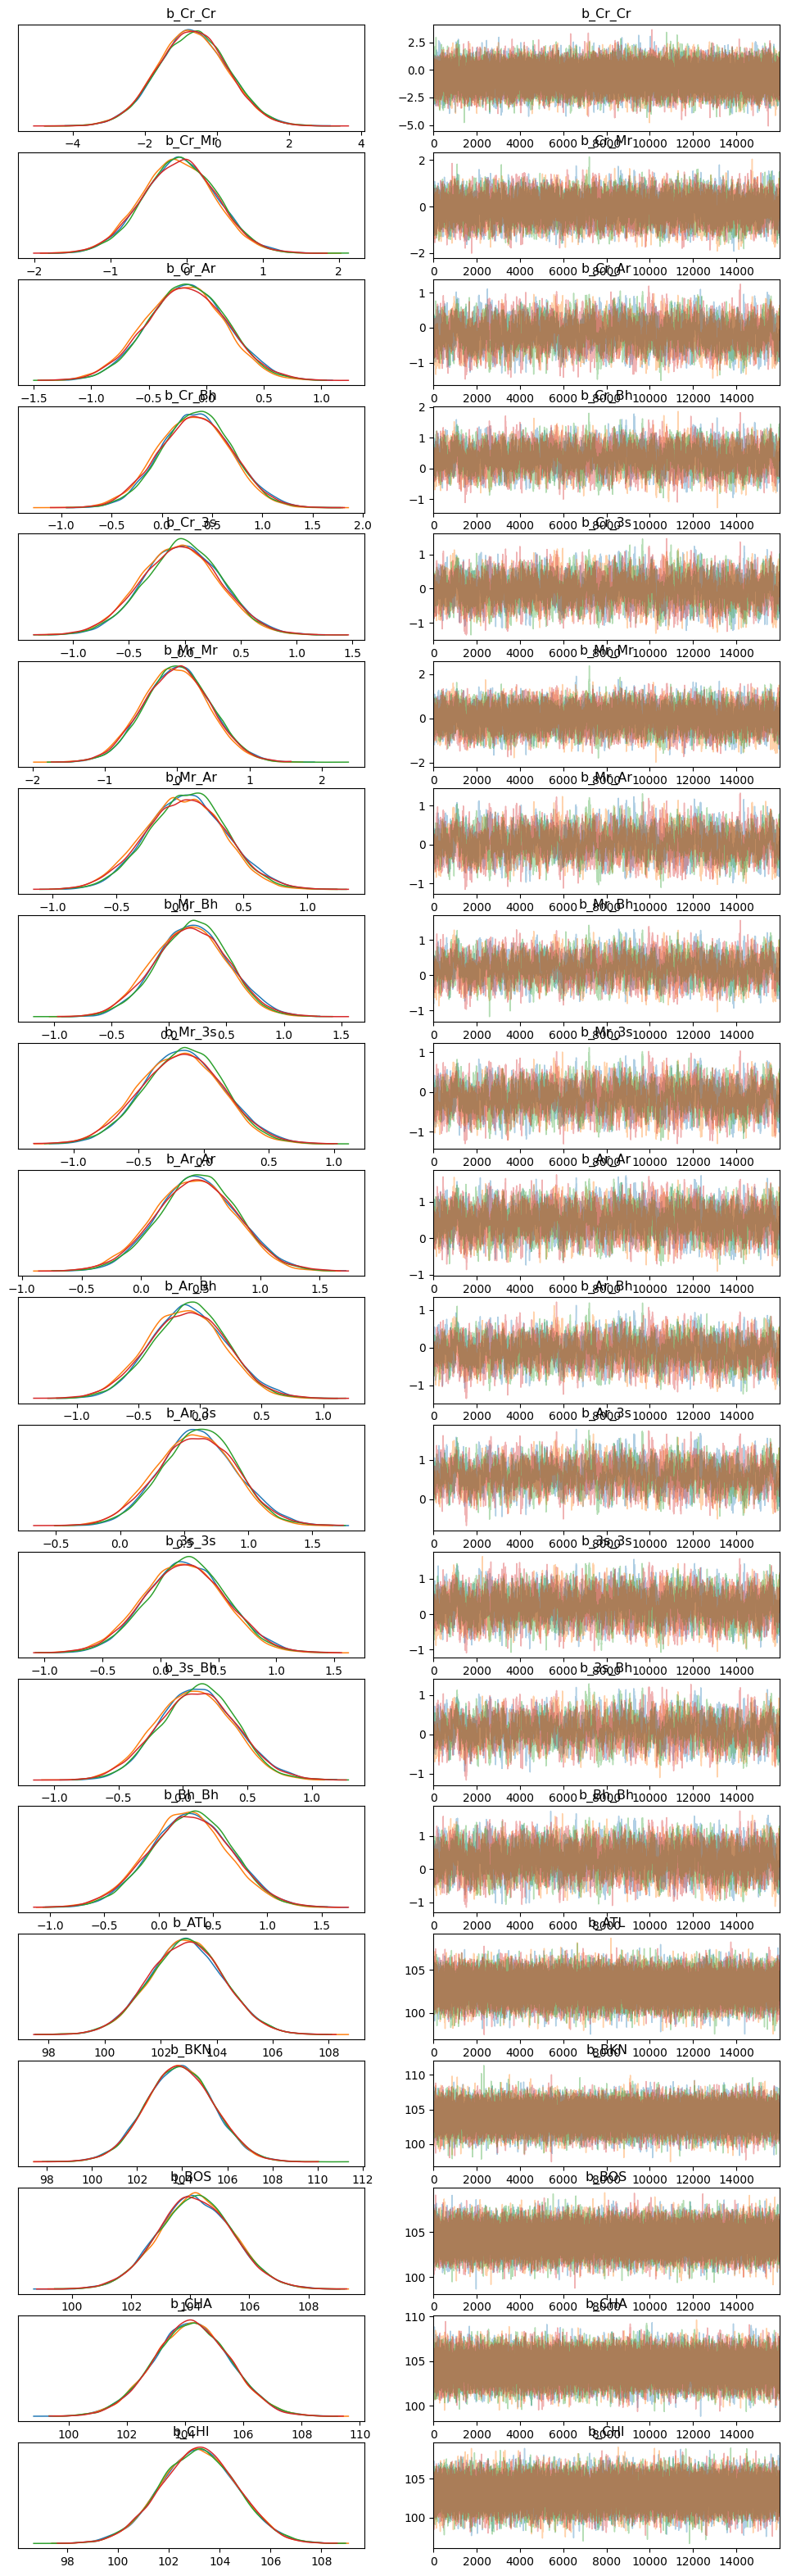

In [16]:
az.plot_trace(idata1_2, compact=False)

In [17]:
param_names1_2 = [rv.name for rv in model1_2.free_RVs]
summary1_2 = az.summary(idata1_2, var_names=param_names1_2)

In [18]:
with open("../pickle_files/idata1_2.pkl", "wb") as f:
    pickle.dump(idata1_2, f)
    pickle.dump(summary1_2, f)

In [19]:
with open('../pickle_files/idata1_2.pkl', 'rb') as f:
    idata1_2 = pickle.load(f)
    summary1_2 = pickle.load(f)

In [20]:
summary1_2[:15].sort_values("mean", ascending=False)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b_Ar_3s,0.602,0.300,0.038,1.159,0.010,0.007,882.0,2398.0,1.0
b_Ar_Ar,0.468,0.339,-0.156,1.112,0.010,0.007,1124.0,3438.0,1.0
b_Cr_Bh,0.338,0.356,-0.332,1.001,0.010,0.007,1194.0,3848.0,1.0
b_Bh_Bh,0.284,0.373,-0.404,0.999,0.010,0.007,1383.0,4306.0,1.0
b_3s_3s,0.216,0.346,-0.425,0.870,0.010,0.007,1170.0,3599.0,1.0
b_Mr_Bh,0.196,0.315,-0.402,0.779,0.010,0.007,943.0,2698.0,1.0
b_3s_Bh,0.106,0.300,-0.459,0.661,0.010,0.007,891.0,2528.0,1.0
b_Mr_Ar,0.047,0.311,-0.547,0.623,0.010,0.007,943.0,2636.0,1.0
b_Mr_Mr,-0.005,0.460,-0.867,0.852,0.010,0.007,2197.0,7871.0,1.0
b_Cr_3s,-0.032,0.350,-0.701,0.614,0.010,0.007,1178.0,3702.0,1.0


In [21]:
rhat_vals1_2 = az.rhat(idata1_2).values()

result1_2 = np.max([np.max(i.values) for i in rhat_vals1_2])
print('Max rhat:', result1_2)

for i in rhat_vals1_2:
    if np.max(i.values)>=1.1:
        print(i.name, np.max(i.values), np.mean(i.values), i.values.shape, sep='  ====>  ')

Max rhat: 1.0039322691780082


In [22]:
df_comp_loo = az.compare({
                          "model1_1": idata1_1, 
                          "model1_2": idata1_2,
                          })
df_comp_loo

/home/k_yamada/.local/lib/python3.8/site-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
model1_2,0,-2600.400340,138.120006,0.000000,0.877329,26.842452,0.000000,True,log
model1_1,1,-2697.933615,49.011666,97.533274,0.122671,25.680890,16.945666,False,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

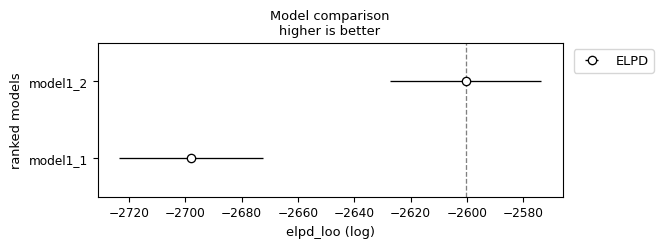

In [23]:
az.plot_compare(df_comp_loo, plot_ic_diff=False)

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

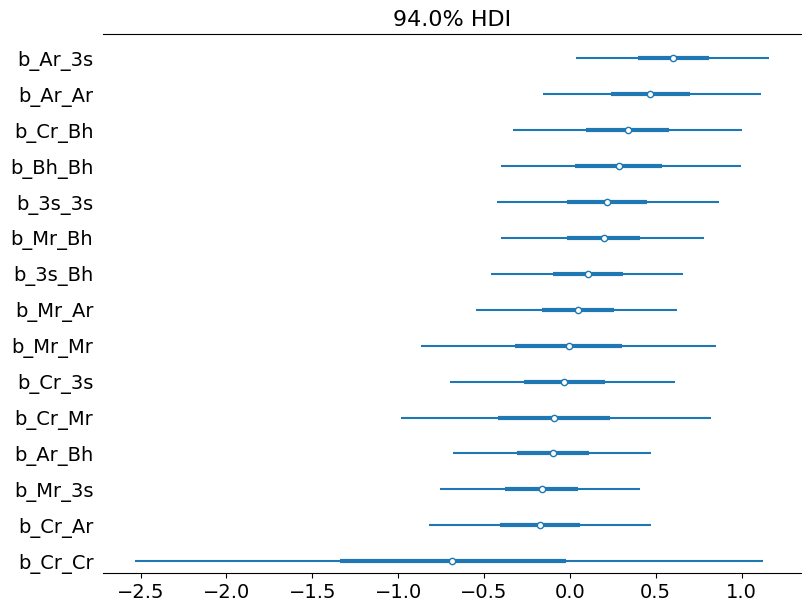

In [24]:
az.plot_forest(idata1_2, var_names=["b_Ar_3s",
                                  "b_Ar_Ar",
                                  "b_Cr_Bh",
                                  "b_Bh_Bh",
                                  "b_3s_3s",
                                  "b_Mr_Bh",
                                  "b_3s_Bh",
                                  "b_Mr_Ar",
                                  "b_Mr_Mr",
                                  "b_Cr_3s",
                                  "b_Cr_Mr",
                                  "b_Ar_Bh",
                                  "b_Mr_3s",
                                  "b_Cr_Ar",
                                  "b_Cr_Cr",],
                combined=True,
                figsize=(9, 7),
                )